In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import os
import pandas as pd
from tifffile import imread, memmap

from caImageAnalysis import BrukerFish
from caImageAnalysis.utils import rotate_image
from caImageAnalysis.visualize import visualize_images, visualize_volumes

### Change the exp_folder to the path of the experiment

In [10]:
# Change this path to the experiment folder
exp_folder = r'/Users/minelarinel/Documents/Duke University/Naumann Lab/DOI/Brain imaging/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104'
region = 'motor_pretectum-000'

In [11]:
# Initialize BrukerFish
fish = BrukerFish(exp_folder, region=region)
fish.data_paths

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

{'frametimes': PosixPath('/Users/minelarinel/Documents/Duke University/Naumann Lab/DOI/Brain imaging/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000_frametimes.h5'),
 'raw_image': PosixPath('/Users/minelarinel/Documents/Duke University/Naumann Lab/DOI/Brain imaging/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000_ch2.tif'),
 'raw': PosixPath('/Users/minelarinel/Documents/Duke University/Naumann Lab/DOI/Brain imaging/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000'),
 'anatomy': None,
 'references': PosixPath('/Users/minelarinel/Documents/Duke University/Naumann Lab/DOI/Brain imaging/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000/References'),
 'voltage_output': PosixPath('/Users/minelarinel/Documents/Duke University/Naumann Lab/DOI/Brain imaging/elavl3H2BGCaMP6s_11dpf_DOI_50ugml_5_20231104/motor_pretectum-000/motor_pretectum-000_Cycle00001_VoltageOutput_001.xml'),
 'log': PosixPath('/Users/minelarinel/Documents/Duke Un

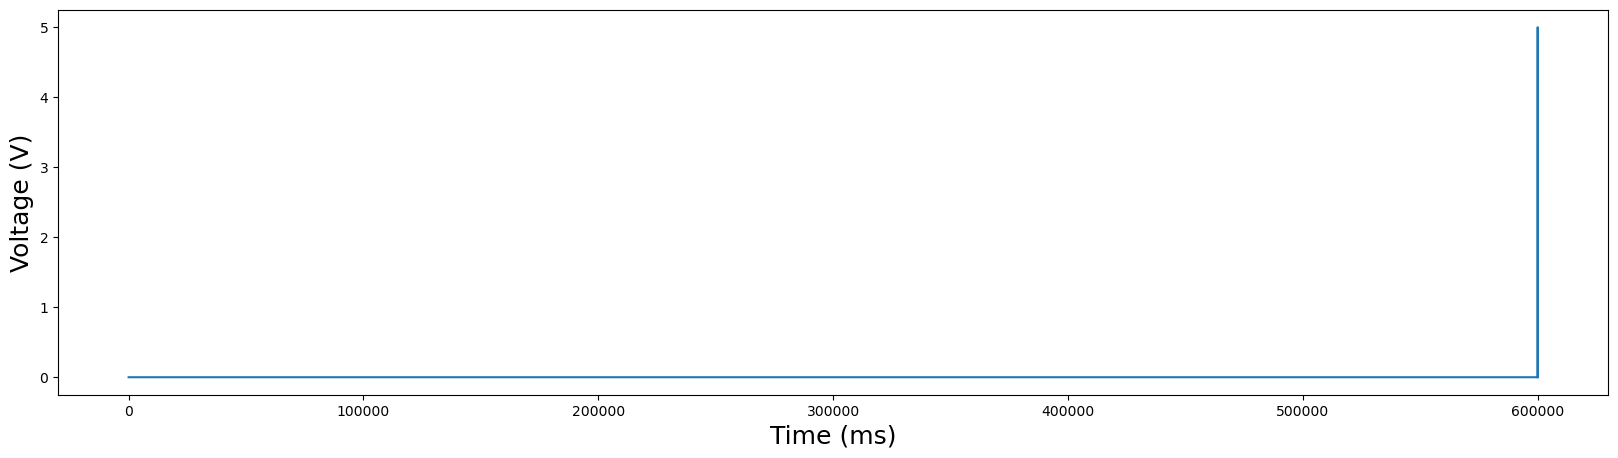

In [11]:
# Plots the Voltage Output waveform of the experiment
if 'voltage_output' in fish.data_paths.keys():
    fish.voltage_output.get_waveform(plot=True)
elif 'markpoints' in fish.data_paths.keys():
    first_cycle = list(fish.markpoints.keys())[0]
    fish.markpoints[first_cycle].get_waveform(plot=True)

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py:192: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 192 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/bruker.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  frames = Bs_data.find_all('frame')


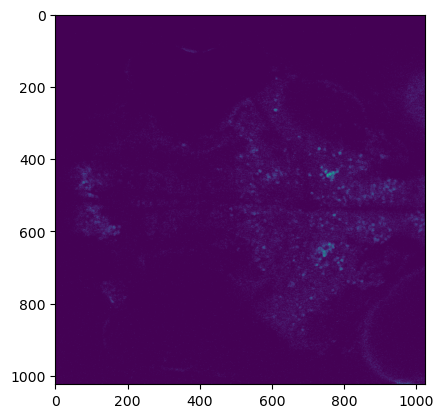

In [12]:
# If running for the first time, create a combined frametimes.txt and combined tif files
fish.create_frametimes_txt()
fish.combine_channel_images('Ch2')

In [13]:
# Check the combined image. If needed, rotate the raw image by angle.
if 'markpoints' in fish.data_paths.keys() or 'vagal_R' in fish.data_paths['raw'].name:
    # coordinate conversion is a pain, rotate the image later
    # and vagal_R is collected in the correct orientation
    pass
else:
    if 'vagal_L' in fish.data_paths['raw'].name:
        angle = 180
    else:
        angle = 90

    fish.rotate_image(fish.data_paths['raw_image'], angle=angle)

: 

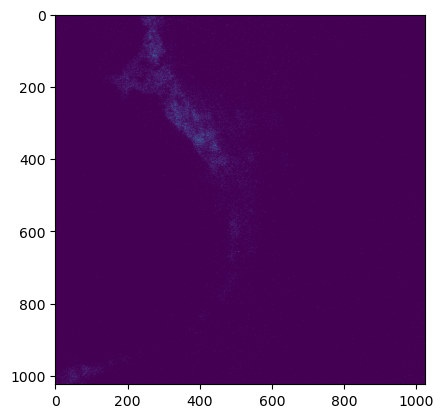

In [24]:
# When the rotation angle is accurate, also rotate and create the anatomy.tif stack
if 'markpoints' in fish.data_paths.keys() or 'vagal_R' in fish.data_paths['raw'].name:
    # coordinate conversion is a pain, rotate the image later
    # and vagal_R is collected in the correct orientation
    pass
else:
    anatomy_img = imread(fish.data_paths['anatomy'])
    anatomy_img_rotated = rotate_image(anatomy_img, path=fish.exp_path.joinpath('anatomy.tif'), angle=angle)
    fish.process_filestructure()

    plt.imshow(anatomy_img_rotated[0])

In [5]:
# Split the raw volumetric image to individual planes
# If it's not volumetric, creates a frametimes.h5 file in the exp_path
if fish.volumetric:
    fish.split_bruker_volumes('Ch2')
else:
    frametimes = fish.frametimes_df.copy()
    frametimes.reset_index(drop=True)
    if len(fish.region) > 0:
        frametimes.to_hdf(os.path.join(fish.exp_path, f'{region}_frametimes.h5'), 'frametimes')
    else:
        frametimes.to_hdf(os.path.join(fish.exp_path, f'frametimes.h5'), 'frametimes')
    fish.process_filestructure()

/var/folders/48/8y2gqcvx5q5575kwkzngl6qw0000gn/T/ipykernel_4777/2219932282.py:9: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->time,key->block0_values] [items->Index(['time'], dtype='object')]

  frametimes.to_hdf(os.path.join(fish.exp_path, f'{region}_frametimes.h5'), 'frametimes')


In [6]:
fish.frametimes_df

,time,pulse
0,18:24:12,0
1,18:24:13.062967,0
2,18:24:14.125934,0
3,18:24:15.001889,0
4,18:24:16.251867,0
...,...,...
2253,19:04:06.864128,1
2254,19:04:07.927095,1
2255,19:04:08.990062,1
2256,19:04:10.053029,1


## Visualize plane(s)

In [ ]:
if fish.volumetric:
    iw = visualize_volumes(fish)
else:
    img = memmap(fish.data_paths['raw_image'])
    iw = visualize_images(imgs=img)

iw.show()

RFBOutputContext()

No such comm: 33dba941a1434d2d85c471b49c924c01
No such comm: 33dba941a1434d2d85c471b49c924c01
No such comm: 33dba941a1434d2d85c471b49c924c01
No such comm: 33dba941a1434d2d85c471b49c924c01
No such comm: 33dba941a1434d2d85c471b49c924c01
No such comm: 33dba941a1434d2d85c471b49c924c01


In [13]:
iw.plot.canvas.close()